# SN Different Roll Periods
* Functional version of the signal to noise for a different point.
* Exploring the S/N for different windows. This uses the functional version of the sn for single point

In [119]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('seaborn-darkgrid')
import xarray as xr
import pandas as pd
from dask.diagnostics import ProgressBar
import matplotlib as mpl
from importlib import reload
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from enum import Enum
from dask.diagnostics import ProgressBar
import sys, matplotlib, os
# Contains path information
sys.path.append('../')
import constants
sys.path.append(constants.MODULE_DIR)
import utils
import signal_to_noise as sn
import xarray_class_accessors as xca
import sn_plotting as sn_plot
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
variable = 'tas'
model = 'ipslcm5a'#'MPIESM11'

In [9]:
ROOT_DIR = os.path.join(constants.LONGRUNMIP_DIR, variable,'regrid_retimestamped')
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/tas/regrid_retimestamped'

In [10]:
IMG_DIR = constants.IMAGE_SAVE_DIR_TOP_LEVEL
IMG_DIR

'/home/563/ab2313/gdata/images/PhD/top_level'

In [254]:
notebook_number ='02'

# Calculation

## Loading Data 
In this notebook everythning need to be run together to check the affect of having different roll period.s

In [12]:
chunks = {'lat':48/2,'lon':96/2,'time':-1}
WINDOW = constants.WINDOWS_OF_INTEREST[1]
WINDOW

80

In [14]:
models = constants.LONGRUNMIP_MODELS
model = 'ipslcm5a'

model_files = [f for f in os.listdir(ROOT_DIR) if ('control' in f or 'abrupt4x' in f) and model in f.lower()]
control_fname = str([f for f in model_files if 'control' in f][0])
abrupt_fname = str([f for f in model_files if 'abrupt' in f][0])
print(control_fname, abrupt_fname, sep=', ')

tas_mon_IPSLCM5A_control_1000_g025.nc, tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc


In [15]:
# Open Data
path_control = os.path.join(ROOT_DIR, control_fname) # 'tas_mon_MPIESM12_control_1237_g025.nc'
control = xr.open_dataset(path_control,use_cftime = True, chunks = chunks).tas

path_abrupt4 = os.path.join(ROOT_DIR, abrupt_fname) # 'tas_ann_MPIESM11_abrupt4x_4459_g025.nc'
abrupt = xr.open_dataset(path_abrupt4,use_cftime = True, chunks = chunks).tas
abrupt

<xarray.DataArray 'tas' (time: 1000, lat: 72, lon: 144)>
dask.array<open_dataset-15c6ef19688a85022a09e6451997b634tas, shape=(1000, 72, 144), dtype=float32, chunksize=(1000, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 1000-12-31 00:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height   float64 ...

In [16]:
### Control
control_anom = control.clima.anomalies()
control_anom_smean = control_anom.clima.space_mean()

### Abrupt
abrupt_anom = abrupt.clima.anomalies(historical = control)
abrupt_anom_smean = abrupt_anom.clima.space_mean()
abrupt_anom_smean

<xarray.DataArray 'tas' (time: 1000)>
dask.array<truediv, shape=(1000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 1000-12-31 00:00:00
    height   float64 2.0

In [237]:
abrupt_anom_smean = abrupt_anom_smean.isel(time=slice(None, constants.LONGRUNMIP_LENGTH))

In [239]:
sn_global_ds, control_sn = sn.calculate_multi_window_rolling_signal_to_nosie_and_bounds(
    abrupt_anom_smean.dropna(dim='time'), control_anom_smean.dropna(dim='time'), 
    start_window=WINDOW, return_all=True)

sn_global_ds = sn_global_ds.isel(time=slice(None, constants.LONGRUNMIP_EFFECTIVE_LENGTH))
sn_global_sn_unstable = sn_global_ds.utils.above_or_below('signal_to_noise', 
                                            greater_than_var='upper_bound', less_than_var='lower_bound')

da_sn_unstable = (sn_global_ds.utils.above_or_below('signal_to_noise', 
                                            greater_than_var='upper_bound', less_than_var='lower_bound')
              .to_array())
da_sn_stable = (sn_global_ds.utils.between('signal_to_noise', 
                                            greater_than_var='lower_bound', less_than_var='upper_bound')
             .to_array())

da_sn_stable


Experiment
--------

[80]
80, 
Control
------

[80]
80, 

<xarray.DataArray (variable: 1, window: 1, time: 650)>
array([[[            nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
...
          1.16146087e+00,  1.33006408e+00,  1.26885625e+00,
          1.01718265e+00,  8.73355691e-01,  9.44488279e-01,
          7.49739928e-01,  6.87048383e-01,  8.72693084e-01,
          1.05985654e+00,  1.19690308e+00,  1.29007421e+00,
          1.45246726e+00,  1.51938667e+00,  1.52325822e+00,
          1.76348494e+00,             nan,             nan,
                     nan,             nan,             nan,
          1.47446715e+00,  1.55388696e+00,  1.57116574e+00,
          1.25876711e+00,  9.01382460e-01,  5.68902646e-01,
          4.85722364e-01,  5.46596970e-01,  4.25642039e-01,
          2.55944888e-01,  3.23675950e-01,  3.83936686e-01,
          3.36086935e-01,  1.72923470e-01,  3.95640032e-02,
         -1.99204065e-02,  8.86243302e-02,  1.00438350e-01,
          2.41821516e-01,  3.29601747e-01,  2.20565163e-01,
          2.34929514e-01,  4.34529074e-01,  4.29758704e-01,
          5.12202720e-01,  6.26218127e-01,  5.18344343e-01,
          5.15469932e-01,  6.34512070e-01,  6.92066532e-01,
          6.83043766e-01,  6.60654890e-01,  7.61465210e-01,
          9.08128443e-01,  1.08153700e+00,  1.20188604e+00,
          1.40615821e+00,  1.38559955e+00]]])
Coordinates:
  * time      (time) object 0001-12-31 00:00:00 ... 0650-12-31 00:00:00
    height    float64 2.0
  * window    (window) int64 80
  * variable  (variable) <U15 'signal_to_noise'

In [240]:
stable_year = sn.get_dataarray_stable_year_multi_window(da_sn_unstable)
stable_year

<xarray.DataArray 'time' (window: 1, variable: 1)>
array([[425]])
Coordinates:
    height    float64 2.0
  * window    (window) int64 80
  * variable  (variable) <U15 'signal_to_noise'

In [241]:
abrupt_stable = abrupt_anom_smean.where(np.isfinite(da_sn_stable))
abrupt_unstable = abrupt_anom_smean.where(~np.isfinite(da_sn_stable))
abrupt_stable

<xarray.DataArray 'tas' (time: 650, variable: 1, window: 1)>
dask.array<where, shape=(650, 1, 1), dtype=float64, chunksize=(650, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0001-12-31 00:00:00 ... 0650-12-31 00:00:00
    height    float64 2.0
  * window    (window) int64 80
  * variable  (variable) <U15 'signal_to_noise'

# Plots

Text(0.5, 1.0, 'Pre-Industrial Control GMST Anomalies and S/N (ipslcm5a)')

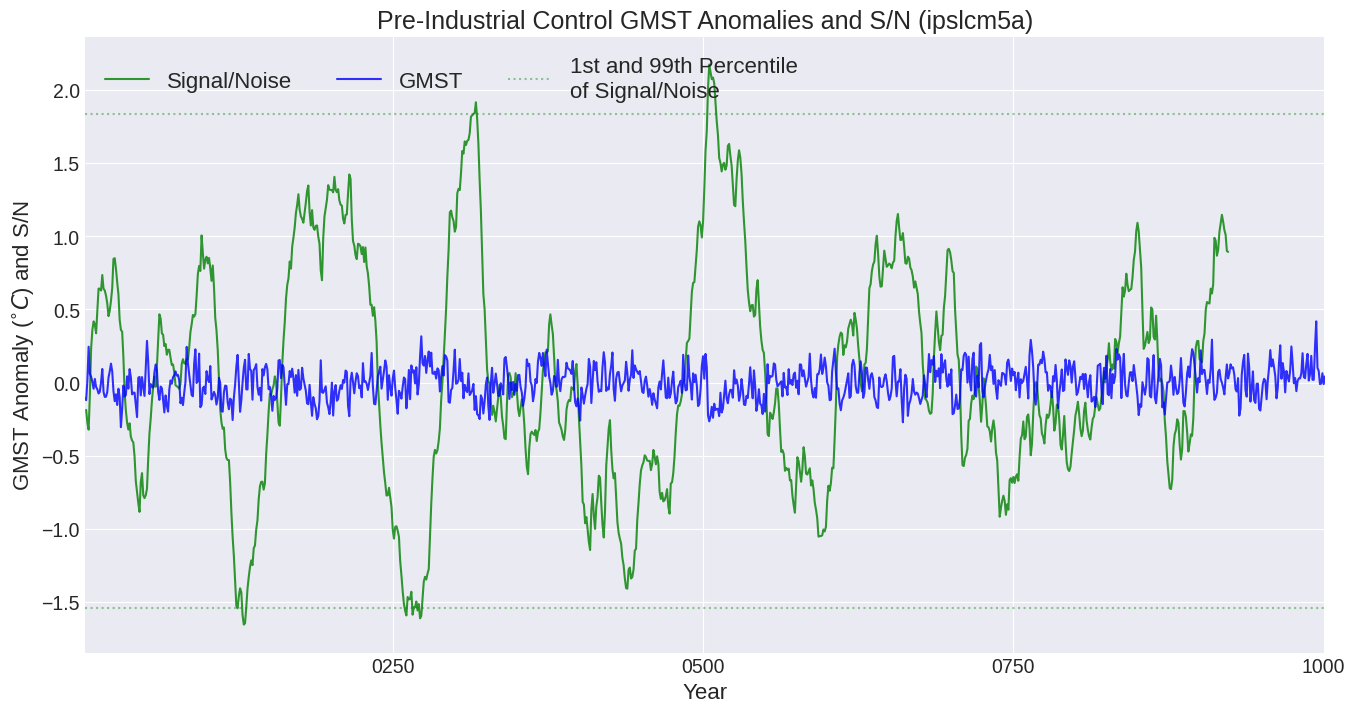

In [242]:
fig = plt.figure(figsize=(16,8))
ax = plt.gca()
control_sn.plot(label='Signal/Noise', ax=ax, color='green', alpha=0.8)
control_anom_smean.plot(label='GMST', ax=ax, color='blue', alpha=0.8)

time = control_anom_smean.time.values

ax.plot(time, [sn_global_ds.lower_bound.values] * len(time), 
        label='1st and 99th Percentile\nof Signal/Noise',
       c='green', linestyle =':', alpha=0.4)

ax.plot(time, [sn_global_ds.upper_bound.values] * len(time),
       c='green', linestyle =':', alpha=0.4)

ax.set_xlim(time[0], time[-1])
ax.legend(ncol=4, fontsize=16, loc='upper left')
ax.set_ylabel(r'GMST Anomaly ($^{\circ}C$) and S/N', size=16);
ax.set_xlabel('Year', size=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title(f'Pre-Industrial Control GMST Anomalies and S/N ({model})', size=18)

In [243]:
sn_global_ds

<xarray.Dataset>
Dimensions:          (time: 650, window: 1)
Coordinates:
  * time             (time) object 0001-12-31 00:00:00 ... 0650-12-31 00:00:00
    height           float64 2.0
  * window           (window) int64 80
Data variables:
    signal_to_noise  (window, time) float64 nan 27.6 26.14 ... 1.202 1.406 1.386
    lower_bound      (window) float64 -1.542
    upper_bound      (window) float64 1.835

In [244]:
stable_arg = int(stable_year.values)
stable_arg

425

In [245]:
stable_point = [sn_global_ds.time.values[stable_arg], 
                float(abrupt_anom_smean.isel(time=stable_arg).values)]
stable_point

[cftime.DatetimeGregorian(426, 12, 31, 0, 0, 0, 0, has_year_zero=False),
 6.812344384392902]

In [246]:
bounds = {'lower': sn_global_ds.lower_bound.values[0], 'upper': sn_global_ds.upper_bound.values[0]}
bounds

{'lower': -1.54197647332841, 'upper': 1.834828439250264}

/home/563/ab2313/gdata/images/PhD/top_level/02_ipslcm5a_80_06_global_sn_temp_anomly_with_boundsand_stable_year.png


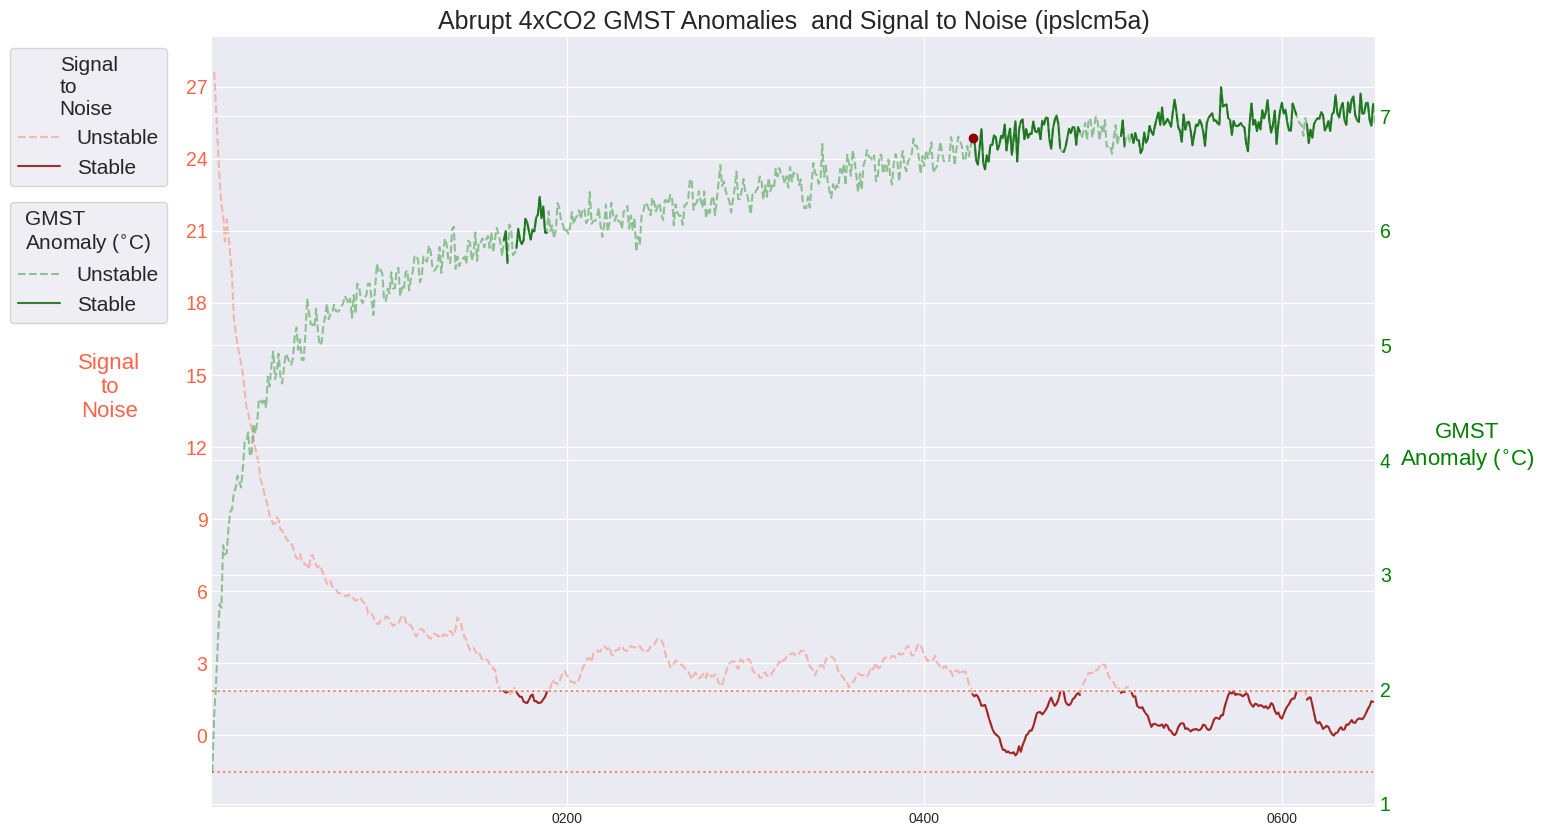

In [262]:
fig, ax1, ax2 = sn_plot.two_line_highlight_plot(
    left_ds=sn_global_ds['signal_to_noise'].squeeze(), 
    right_ds=abrupt_anom_smean, 
    left_highlight_ds = da_sn_stable.squeeze(),
    right_highlight_ds = abrupt_stable.squeeze(), 
    bounds=bounds,
    left_label='Signal\nto\nNoise',
    right_label='GMST\nAnomaly'+ r' ($^{\circ}$C)'
)

ax2.plot(*stable_point, marker='o', markersize=6, markerfacecolor='darkred', markeredgecolor='darkred')
ax1.set_xlim(abrupt_anom_smean.time.values[0], 
             abrupt_anom_smean.time.values[constants.LONGRUNMIP_EFFECTIVE_LENGTH])
ax1.set_title(f'Abrupt 4xCO2 GMST Anomalies  and Signal to Noise ({model})', fontsize=18);

save_name = os.path.join(IMG_DIR,
        f'{notebook_number}_{model}_{WINDOW}_06_global_sn_temp_anomly_with_boundsand_stable_year.png')
print(save_name)
fig.savefig(save_name, bbox_inches='tight', dpi=500)

# Multi-window

We now want to test the effect of multiple-windows.

In [104]:
unstable_sn_multi_window_da , stable_sn_multi_window_da = sn.sn_multi_window(
    abrupt_anom_smean,control_anom_smean, start_window=21, end_window=500, step_window=2, parallel=True)


Experiment
--------

range(21, 500, 2)
29, 21, 37, 45, 53, 61, 77, 85, 69, 93, 101, 117, 109, 133, 125, 141, 31, 23, 55, 79, 63, 135, 39, 47, 127, 87, 95, 71, 119, 103, 111, 81, 137, 25, 143, 65, 33, 57, 49, 129, 97, 67, 139, 121, 41, 113, 83, 105, 27, 89, 73, 51, 131, 149, 99, 145, 157, 165, 43, 123, 115, 91, 35, 59, 107, 181, 173, 151, 75, 189, 167, 197, 159, 147, 175, 205, 183, 221, 213, 229, 237, 191, 153, 245, 253, 261, 161, 169, 269, 199, 207, 177, 223, 155, 231, 185, 163, 271, 171, 201, 239, 263, 255, 215, 247, 179, 209, 203, 277, 193, 217, 225, 233, 285, 273, 257, 265, 187, 293, 301, 249, 241, 279, 195, 275, 309, 211, 267, 219, 235, 259, 287, 227, 281, 317, 311, 243, 295, 303, 251, 333, 325, 341, 349, 357, 365, 289, 373, 305, 297, 381, 389, 313, 283, 335, 351, 359, 375, 343, 319, 291, 327, 299, 391, 397, 405, 367, 307, 315, 353, 383, 321, 345, 413, 377, 361, 329, 369, 393, 337, 421, 429, 379, 323, 385, 347, 363, 437, 331, 407, 339, 371, 399, 423, 355, 395, 431, 445, 387, 453, 

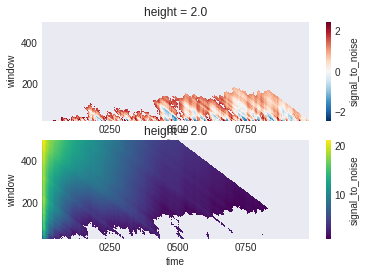

In [105]:
fig, (ax1, ax2) = plt.subplots(2,1)
stable_sn_multi_window_da['signal_to_noise'].plot(ax=ax1)
unstable_sn_multi_window_da['signal_to_noise'].plot(ax=ax2)

- {'ax2_ylabel': 'Anomaly',
 'cbar_label': 'S/N',
 'cbar_ticks': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 'cbar_xticklabels': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 'cbartick_offset': 0,
 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7f39cc0e4eb0>,
 'extend': 'both',
 'filter_max': False,
 'height': 15,
 'hspace': 0.3,
 'label_size': 12,
 'levels': array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 'line_alpha': 0.65,
 'line_color': 'limegreen',
 'step': 1,
 'title': 'ipslcm5a',
 'vmax': 8,
 'vmin': -8,
 'width': 7,
 'xlowerlim': None,
 'xupperlim': None}
- data_vars=['variable']
- No matching models found data_vars=['variable']


(0.0, 4500.0)

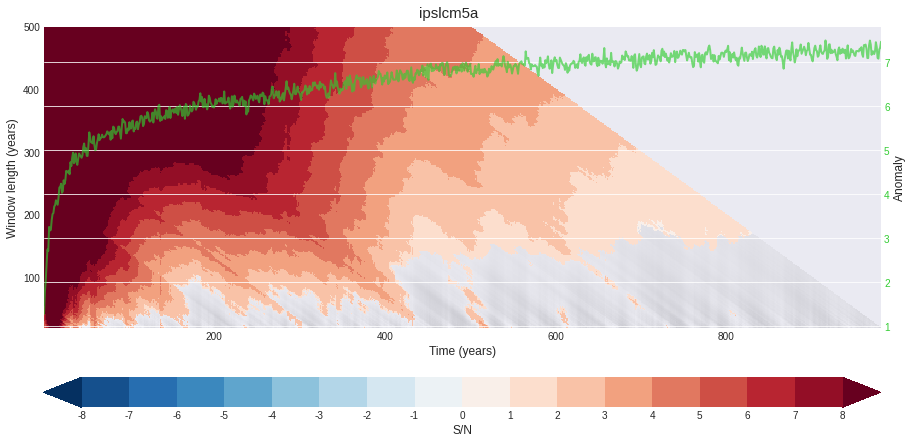

In [106]:
sn_plot.sn_multi_window_in_time(unstable_sn_multi_window_da['signal_to_noise'], 
                            stable_sn_multi_window_da['signal_to_noise'],
                            abrupt_anom_smean, title=model, step=1);
ax.set_xlim([0,4500])
# fig.savefig(f'{IMG_DIR}/{notebook_number}_{model}_SN_multi_window_long_small_step.png', dpi=400, bbox_inches='tight')